In [1]:
from google.colab import drive
drive.mount("/drive")

Mounted at /drive


In [2]:
import numpy
import pandas

from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import lightgbm as lgb

#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import explained_variance_score
#from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.constraints import maxnorm

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [3]:
dataframe = pandas.read_csv("/drive/My Drive/car_price/propulsion.csv")#, header=None)
dataframe.head(5)

,Unnamed: 0,Lever position (lp) [ ],Ship speed (v) [knots],Gas Turbine shaft torque (GTT) [kN m],Gas Turbine rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],HP Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],Gas Turbine exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient.,GT Turbine decay state coefficient.
0,0,9.300,27.0,72762.205,3560.393,9753.812,644.806,644.806,1086.583,288.0,780.304,4.523,0.998,22.879,1.050,90.435,1.790,0.973,0.978
1,1,6.175,18.0,29760.552,2306.825,8780.012,246.011,246.011,776.921,288.0,665.511,2.518,0.998,13.438,1.030,34.596,0.685,0.995,0.975
2,2,3.144,9.0,8375.774,1386.739,7051.621,60.318,60.318,589.764,288.0,580.587,1.392,0.998,7.566,1.020,12.477,0.247,0.980,0.978
3,3,3.144,9.0,8377.589,1386.748,7098.469,60.339,60.339,570.651,288.0,576.565,1.390,0.998,7.409,1.021,11.678,0.231,0.984,1.000
4,4,6.175,18.0,29761.091,2306.825,8782.024,246.021,246.021,769.855,288.0,663.682,2.518,0.998,13.374,1.031,34.154,0.676,0.998,0.980


In [4]:
dataframe = dataframe.round(3)

In [5]:
print("Shape:", dataframe.shape)

Shape: (10000, 19)


In [6]:
dataframe = dataframe.iloc[:, 1:]

In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lever position (lp) [ ]                        10000 non-null  float64
 1   Ship speed (v) [knots]                         10000 non-null  float64
 2   Gas Turbine shaft torque (GTT) [kN m]          10000 non-null  float64
 3   Gas Turbine rate of revolutions (GTn) [rpm]    10000 non-null  float64
 4   Gas Generator rate of revolutions (GGn) [rpm]  10000 non-null  float64
 5   Starboard Propeller Torque (Ts) [kN]           10000 non-null  float64
 6   Port Propeller Torque (Tp) [kN]                10000 non-null  float64
 7   HP Turbine exit temperature (T48) [C]          10000 non-null  float64
 8   GT Compressor inlet air temperature (T1) [C]   10000 non-null  float64
 9   GT Compressor outlet air temperature (T2) [C]  1000

In [8]:
dataframe.columns = ['lever_position', 'ship_speed', 'gt_shaft', 'gt_rate', 'gg_rate', 'sp_torque', 'pp_torque', 'hpt_temp', 'gt_c_i_temp', 'gt_c_o_temp', 'hpt_pressure', 'gt_c_i_pressure', 'gt_c_o_pressure', 'gt_exhaust_pressure', 'turbine_inj_control', 'fuel_flow', 'gt_c_decay',  'gt_t_decay']

In [9]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   lever_position       10000 non-null  float64
 1   ship_speed           10000 non-null  float64
 2   gt_shaft             10000 non-null  float64
 3   gt_rate              10000 non-null  float64
 4   gg_rate              10000 non-null  float64
 5   sp_torque            10000 non-null  float64
 6   pp_torque            10000 non-null  float64
 7   hpt_temp             10000 non-null  float64
 8   gt_c_i_temp          10000 non-null  float64
 9   gt_c_o_temp          10000 non-null  float64
 10  hpt_pressure         10000 non-null  float64
 11  gt_c_i_pressure      10000 non-null  float64
 12  gt_c_o_pressure      10000 non-null  float64
 13  gt_exhaust_pressure  10000 non-null  float64
 14  turbine_inj_control  10000 non-null  float64
 15  fuel_flow            10000 non-null  

In [10]:
print("Statistical Description:", dataframe.describe())

Statistical Description:        lever_position    ship_speed  ...    gt_c_decay    gt_t_decay
count    10000.000000  10000.000000  ...  10000.000000  10000.000000
mean         5.150075     14.951400  ...      0.975021      0.987455
std          2.624015      7.740467  ...      0.014734      0.007510
min          1.138000      3.000000  ...      0.950000      0.975000
25%          3.144000      9.000000  ...      0.962000      0.981000
50%          5.140000     15.000000  ...      0.975000      0.987000
75%          7.148000     21.000000  ...      0.988000      0.994000
max          9.300000     27.000000  ...      1.000000      1.000000

[8 rows x 18 columns]


In [11]:
dataframe1 = dataframe['gt_c_i_temp']#,'gt_c_i_pressure']
dataframe1.describe()

count    10000.0
mean       288.0
std          0.0
min        288.0
25%        288.0
50%        288.0
75%        288.0
max        288.0
Name: gt_c_i_temp, dtype: float64

In [12]:
dataframe = dataframe.drop(["gt_c_i_temp"],axis=1)

In [13]:
print("Shape:", dataframe.shape)

Shape: (10000, 17)


In [14]:
print("Data Types:", dataframe.dtypes)

Data Types: lever_position         float64
ship_speed             float64
gt_shaft               float64
gt_rate                float64
gg_rate                float64
sp_torque              float64
pp_torque              float64
hpt_temp               float64
gt_c_o_temp            float64
hpt_pressure           float64
gt_c_i_pressure        float64
gt_c_o_pressure        float64
gt_exhaust_pressure    float64
turbine_inj_control    float64
fuel_flow              float64
gt_c_decay             float64
gt_t_decay             float64
dtype: object


In [15]:
dataset = dataframe.values


In [16]:
X = dataset[:,0:15]
Y = dataset[:,15]
Y2 = dataset[:,16] 

In [17]:
#Feature Selection
model = ExtraTreesRegressor()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)

In [18]:
print("Number of Features: ", fit.n_features_)
print("Selected Features: ", fit.support_)
print("Feature Ranking: ", fit.ranking_)

Number of Features:  3
Selected Features:  [False False False False  True False False False  True False False False
  True False False]
Feature Ranking:  [11 12  2  5  1  7  6  4  1  3 13  9  1 10  8]


In [19]:
#Feature Selection
model = ExtraTreesRegressor()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y2)

print("Number of Features: ", fit.n_features_)
print("Selected Features: ", fit.support_)
print("Feature Ranking: ", fit.ranking_) 

Number of Features:  3
Selected Features:  [False False False False  True False False False False False False  True
 False False  True]
Feature Ranking:  [11 12  3  4  1  9 10  5  8  7 13  1  6  2  1]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fabe89210b8>,
      dtype=object)

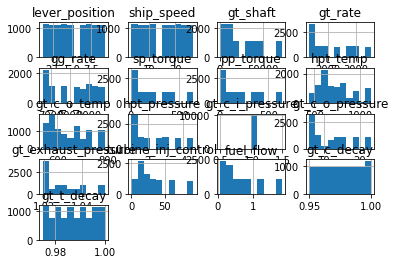

In [20]:
dataframe.hist()

In [21]:
# Split Data to Train and Test
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.2)

num_instances = len(X)

models = []
models.append(('LiR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Bag_Re', BaggingRegressor()))
models.append(('RandomForest', RandomForestRegressor()))
models.append(('ExtraTreesRegressor', ExtraTreesRegressor()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))

# Evaluations
results = []
names = []
scoring = []

for name, model in models:
    # Fit the model
    model.fit(X_Train, Y_Train)
    
    predictions = model.predict(X_Test)
    
    # Evaluate the model
    score = explained_variance_score(Y_Test, predictions)
    mae = mean_absolute_error(predictions, Y_Test)
    # print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    results.append(mae)
    names.append(name)
    
    msg = "%s: %f (%f)" % (name, score, mae)
    print(msg)


LiR: 0.842654 (0.004510)
Ridge: 0.822733 (0.005060)
Bag_Re: 0.991014 (0.000693)
RandomForest: 0.993167 (0.000600)
ExtraTreesRegressor: 0.997383 (0.000376)
KNN: 0.918083 (0.001626)
CART: 0.977647 (0.001093)


## **save the model**

In [24]:
import pickle 
model1 = ExtraTreesRegressor()
model1.fit(X_Train, Y_Train)
model_GT_C_D1 = '/drive/My Drive/car_price/finalized_model_GT_C_D1.sav'
pickle.dump(model1, open(model_GT_C_D1, 'wb'))

In [25]:
# Split Data to Train and Test
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y2, test_size=0.2)

num_instances = len(X)

models = []
models.append(('LiR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Bag_Re', BaggingRegressor()))
models.append(('RandomForest', RandomForestRegressor()))
models.append(('ExtraTreesRegressor', ExtraTreesRegressor()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))

# Evaluations
results = []
names = []
scoring = []

for name, model in models:
    # Fit the model
    model.fit(X_Train, Y_Train)
    
    predictions = model.predict(X_Test)
    
    # Evaluate the model
    score = explained_variance_score(Y_Test, predictions)
    mae = mean_absolute_error(predictions, Y_Test)
    # print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    results.append(mae)
    names.append(name)
    
    msg = "%s: %f (%f)" % (name, score, mae)
    print(msg)

LiR: 0.911665 (0.001698)
Ridge: 0.861165 (0.002125)
Bag_Re: 0.988691 (0.000430)
RandomForest: 0.990088 (0.000371)
ExtraTreesRegressor: 0.993311 (0.000246)
KNN: 0.858602 (0.001220)
CART: 0.970659 (0.000616)


In [26]:
model1 = ExtraTreesRegressor()
model1.fit(X_Train, Y_Train)
model_GT_T_D1 = '/drive/My Drive/car_price/finalized_model_GT_T_D1.sav'
pickle.dump(model1, open(model_GT_T_D1, 'wb'))

In [28]:
# Split Data to Train and Test
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.3)




# create model
model = Sequential()
model.add(Dense(6, input_dim=15, kernel_initializer='random_uniform', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, kernel_initializer='random_uniform', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(2, kernel_initializer='random_uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='random_uniform', activation='relu'))

# Compile model
model.compile(loss='mean_absolute_error', optimizer='adam')

# Fit the model
model.fit(X_Train, Y_Train, epochs=100, batch_size=10)

# Evaluate the model
scores = model.evaluate(X_Test, Y_Test)
print("score: %.2f%%" % (100-scores))



Epoch 1/100
700/700 [==============================] - 1s 953us/step - loss: 0.1928
Epoch 2/100
700/700 [==============================] - 1s 950us/step - loss: 0.0726
Epoch 3/100
700/700 [==============================] - 1s 916us/step - loss: 0.0451
Epoch 4/100
700/700 [==============================] - 1s 926us/step - loss: 0.0235
Epoch 5/100
700/700 [==============================] - 1s 945us/step - loss: 0.0159
Epoch 6/100
700/700 [==============================] - 1s 918us/step - loss: 0.0159
Epoch 7/100
700/700 [==============================] - 1s 901us/step - loss: 0.0148
Epoch 8/100
700/700 [==============================] - 1s 926us/step - loss: 0.0148
Epoch 9/100
700/700 [==============================] - 1s 931us/step - loss: 0.0144
Epoch 10/100
700/700 [==============================] - 1s 917us/step - loss: 0.0139
Epoch 11/100
700/700 [==============================] - 1s 956us/step - loss: 0.0132
Epoch 12/100
700/700 [==============================] - 1s 929us/step - lo

In [32]:
# Split Data to Train and Test
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y2, test_size=0.3)




# create model
model = Sequential()
model.add(Dense(6, input_dim=15, kernel_initializer='random_uniform', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, kernel_initializer='random_uniform', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(2, kernel_initializer='random_uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='random_uniform', activation='relu'))

# Compile model
model.compile(loss='mean_absolute_error', optimizer='adam')

# Fit the model
model.fit(X_Train, Y_Train, epochs=100, batch_size=10)

# Evaluate the model
scores = model.evaluate(X_Test, Y_Test)
print("score: %.2f%%" % (100-scores))



Epoch 1/100
700/700 [==============================] - 1s 936us/step - loss: 0.2651
Epoch 2/100
700/700 [==============================] - 1s 941us/step - loss: 0.0787
Epoch 3/100
700/700 [==============================] - 1s 922us/step - loss: 0.0075
Epoch 4/100
700/700 [==============================] - 1s 928us/step - loss: 0.0068
Epoch 5/100
700/700 [==============================] - 1s 990us/step - loss: 0.0067
Epoch 6/100
700/700 [==============================] - 1s 952us/step - loss: 0.0068
Epoch 7/100
700/700 [==============================] - 1s 1ms/step - loss: 0.0068
Epoch 8/100
700/700 [==============================] - 1s 951us/step - loss: 0.0067
Epoch 9/100
700/700 [==============================] - 1s 968us/step - loss: 0.0067
Epoch 10/100
700/700 [==============================] - 1s 971us/step - loss: 0.0068
Epoch 11/100
700/700 [==============================] - 1s 976us/step - loss: 0.0067
Epoch 12/100
700/700 [==============================] - 1s 965us/step - loss